In [4]:
# Cell 1: Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database
conn = sqlite3.connect('../data/database/crop_recommendation.db')
print("Connected to database")

Connected to database


In [ ]:
# Basic Statistics
query1 = """
SELECT 
    COUNT(*) as total_samples,
    COUNT(DISTINCT label) as total_crops
FROM crops;
"""

result = pd.read_sql_query(query1, conn)
print("Database Overview:")
print(result)

Database Overview:
   total_samples  total_crops
0           8800           22


In [ ]:
# Low Nitrogen Crops
query2 = """
SELECT 
    crop,
    ROUND(N_avg, 2) as avg_nitrogen_required,
    ROUND(N_min, 2) as min_nitrogen,
    ROUND(N_max, 2) as max_nitrogen
FROM crop_requirements
WHERE N_avg < 50
ORDER BY N_avg ASC;
"""

low_nitrogen_crops = pd.read_sql_query(query2, conn)
print("Crops for Low Nitrogen Soil:")
print(low_nitrogen_crops)

Crops for Low Nitrogen Soil:
           crop  avg_nitrogen_required  min_nitrogen  max_nitrogen
0        lentil                  23.27           0.0          49.0
1   pomegranate                  23.37           0.0          49.0
2        orange                  24.08           0.0          49.0
3         mango                  24.57           0.0          49.0
4    pigeonpeas                  25.23           0.0          49.0
5   kidneybeans                  25.25           0.0          49.0
6      mungbean                  25.49           0.0          49.0
7    groundnuts                  25.94           0.0          49.0
8     mothbeans                  25.94           0.0          49.0
9       coconut                  26.48           0.0          49.0
10       grapes                  27.68           0.0          49.0
11    blackgram                  44.52          20.0          69.0
12     chickpea                  44.59          20.0          69.0


In [ ]:
# High Temperature Crops
query7 = """
SELECT 
    crop,
    ROUND(temp_avg, 2) as avg_temperature,
    ROUND(temp_max, 2) as max_temperature,
    ROUND(rainfall_avg, 2) as avg_rainfall
FROM crop_requirements
WHERE temp_avg > 30
ORDER BY temp_avg DESC;
"""

hot_crops = pd.read_sql_query(query7, conn)
print("High Temperature Tolerant Crops:")
print(hot_crops)

High Temperature Tolerant Crops:
        crop  avg_temperature  max_temperature  avg_rainfall
0     papaya            34.90            46.73        142.63
1      mango            32.30            38.51         94.70
2  blackgram            31.02            37.39         67.88


Drought Tolerant Crops:
         crop  avg_rainfall_mm  min_rainfall  avg_temperature
0   muskmelon            24.69         20.21            29.67
1      lentil            45.68         35.03            25.37
2    mungbean            48.40         36.12            29.52
3  watermelon            50.79         40.13            26.49
4  groundnuts            51.20         30.92            29.18
5   mothbeans            51.20         30.92            29.18
6   blackgram            67.88         60.42            31.02
7      grapes            69.61         65.01            24.68


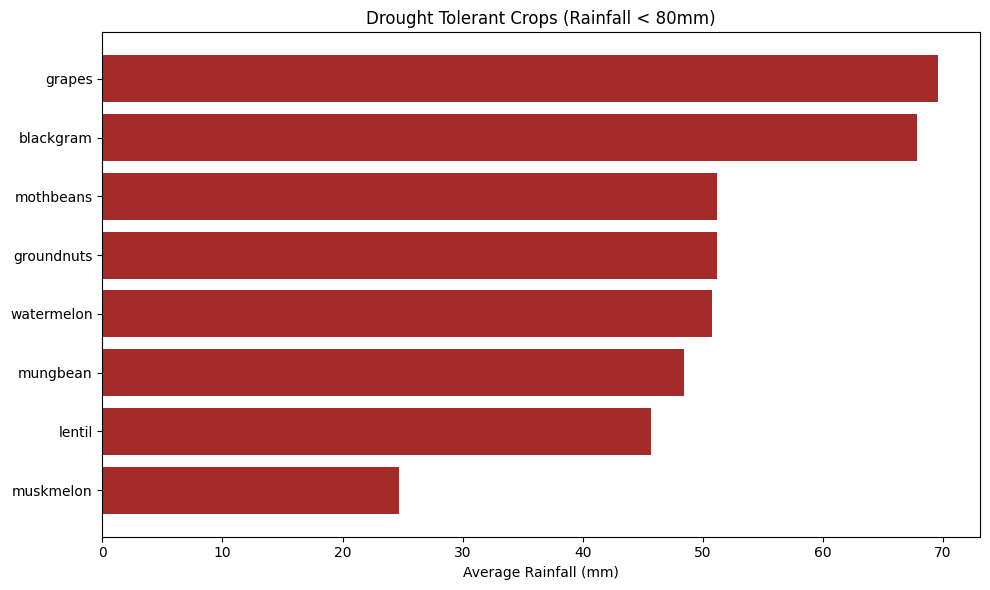

In [ ]:
# Drought Tolerant Crops
query10 = """
SELECT 
    crop,
    ROUND(rainfall_avg, 2) as avg_rainfall_mm,
    ROUND(rainfall_min, 2) as min_rainfall,
    ROUND(temp_avg, 2) as avg_temperature
FROM crop_requirements
WHERE rainfall_avg < 80
ORDER BY rainfall_avg ASC;
"""

drought_crops = pd.read_sql_query(query10, conn)
print("Drought Tolerant Crops:")
print(drought_crops)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(drought_crops['crop'], drought_crops['avg_rainfall_mm'], color='brown')
plt.xlabel('Average Rainfall (mm)')
plt.title('Drought Tolerant Crops (Rainfall < 80mm)')
plt.tight_layout()
plt.show()

Crops by Climate Type:
climate_type
Cool & Dry                                                      [chickpea]
Warm & Dry               [blackgram, cotton, grapes, groundnuts, lentil...
Warm & Wet (Tropical)    [banana, coconut, coffee, jute, kidneybeans, o...
Name: crop, dtype: object


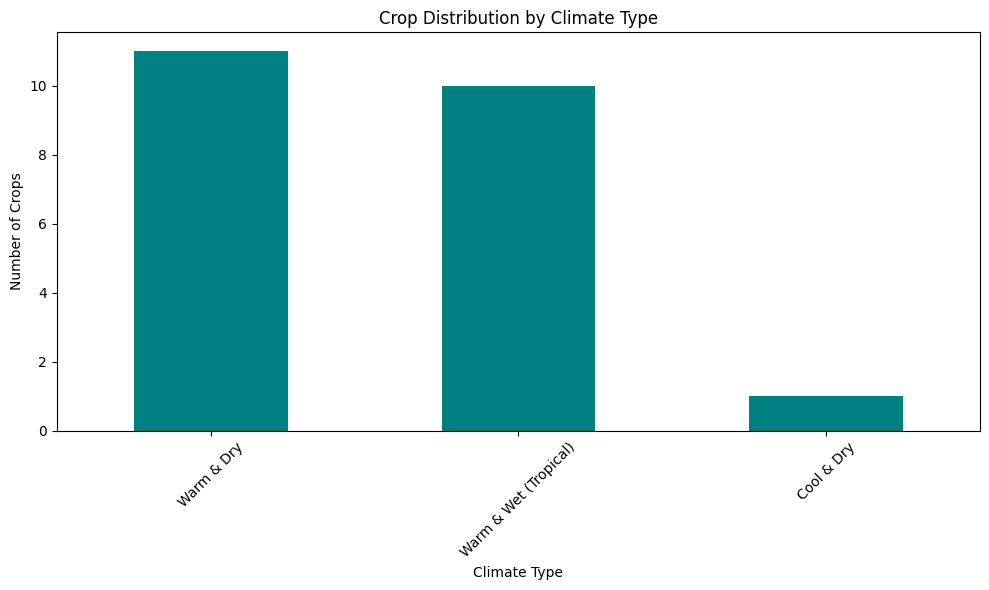

In [ ]:
# Climate Categorization
query15 = """
SELECT 
    crop,
    ROUND(temp_avg, 2) as avg_temp,
    ROUND(rainfall_avg, 2) as avg_rainfall,
    CASE 
        WHEN temp_avg < 20 AND rainfall_avg < 100 THEN 'Cool & Dry'
        WHEN temp_avg < 20 AND rainfall_avg >= 100 THEN 'Cool & Wet'
        WHEN temp_avg >= 20 AND rainfall_avg < 100 THEN 'Warm & Dry'
        ELSE 'Warm & Wet (Tropical)'
    END as climate_type
FROM crop_requirements
ORDER BY climate_type, crop;
"""

climate_crops = pd.read_sql_query(query15, conn)
print("Crops by Climate Type:")
print(climate_crops.groupby('climate_type')['crop'].apply(list))

# Count by climate
climate_counts = climate_crops['climate_type'].value_counts()
plt.figure(figsize=(10, 6))
climate_counts.plot(kind='bar', color='teal')
plt.title('Crop Distribution by Climate Type')
plt.xlabel('Climate Type')
plt.ylabel('Number of Crops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Close connection
conn.close()
print("Database connection closed")

Database connection closed
